# $k$-Means Clustering

## Supervised vs. unsupervised learning

Unlike the supervised learning algorithms we considered so far, where the dataset consisted of labeled examples $\{(x_i, y_i)\}_{i=1}^{n}$, in **unsupervised learning**, the dataset is a collection of unlabeled examples $\{x_i\}_{i=1}^{n}$. The goal of an unsupervised learning algorithm  is to create a model that takes a feature vector $x$ as input and either transforms it into another vector or into a value that can be used to solve a practical problem.

Recall that, in supervised learning, lack of success can be measured by expected loss which can be estimated in a variety of ways including cross-validation. However, in unsupervised learning, it is difficult to ascertain the validity of inferences drawn from the output of most unsupervised learning algorithms. One must resort to heuristic arguments not only for motivating the algorithms, but also for judgments as to the quality of the results.

As a consequence, unsupervised algorithms are used often in an exploratory setting, when a data scientist wants to understand the data better, rather than as part of a larger automatic system. Another common application for unsupervised algorithms is as a preprocessing step for supervised algorithms. Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms, or can lead to reduced memory and time consumption.

## Clustering

*Clustering* is the task of partitioning a given dataset into groups, called **clusters**. This is an example of unsupervised learning, where the dataset is a collection of unlabeled feature vectors $\{x_i\}_{i=1}^{n}$. The goal in clustering is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. 

Similar to classification algorithms, clustering algorithms assign a number to each data point, indicating which cluster a particular point belongs to. Since the dataset is completely unlabeled and the similarity assumptions may vary in practice, deciding on whether the learned model is optimal is more complicated than in supervised learning. So, there is a wide variety of clustering algorithms that, on some input data, will output very different clusterings. 

## The $k$-means algorithm

One of the most useful and widely used clustering algorithms is the *$k$-means algorithm*, where the data is partitioned into disjoint sets $C_1, \dots , C_k$ where each *cluster* $C_i$ is represented by a *centroid* $\mu_i$. It is assumed that the input set is embedded in a metric space $(\mathcal{X}, d)$ so that the centroids are members of $\mathcal{X}$. The centroid of $C_i$ is then defined to be 

$$\mu_i = \text{argmin}_{\mu \in \mathcal{X}} \sum_{x \in C_i} d(x, \mu)^2.$$

Then, the objective is

$$\min_{\mu_1, \dots, \mu_k} \sum_{i=1}^{k} \sum_{x \in C_i} d(x, \mu_i)^2 .$$

Finding the optimal solution is often computationally infeasible (NP-hard) in this case. As an alternative, a simple iterative algorithm as in the following is often used, which converges possibly to a suboptimal local minimum. Let us consider the metric space $\mathcal{X} = \mathbb{R}^d$ with the Euclidean distance 

$$d(x,y) = \| x-y \|.$$

$\quad \quad \quad$ **$k$-Means**:

**Input**: $\{ x_i \}_{i=1}^{n} \subset \mathbb{R}^d$, number of clusters $k$.

**Initialize**: Randomly choose initial centroids $\mu_1,\dots,\mu_k$.

**Repeat until convergence**

$\quad \quad$ $\forall i \in [k]$ set $C_i = \{ x \in \mathcal{X} : i = \text{argmin}_j \| x - \mu_j\| \}$

$\quad \quad$ $\forall i \in [k]$ update $\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
from sklearn.metrics import pairwise_distances

def k_means(X, k, dist='euclidean', plot_iter=False):
    ## Randomly choose initial centroids.
    init = np.random.choice(X.shape[0], k, replace=False) 
                    ## A uniform random sample from np.arange(n) of size k without replacement.
    centroids = X[init]
    
    while True:
        ## Assign labels with respect to the closest centroid.
        labels = pairwise_distances(X, centroids, metric=dist).argmin(axis=1)
                    ## Computes for each row in X, the index of the row of centroids which is closest.

        ## Elaborate code for the argmin above.
        #n = X.shape[0]
        #labels=np.zeros(n, dtype=np.int)
        #for i in range(n):
        #    min_dist = np.Inf
        #    for j in range(k):
        #        dist = np.linalg.norm(X[i] - centroids[j])
        #        if dist < min_dist:
        #            argmin = j
        #            min_dist = dist
        #    labels[i] = argmin
        
        ## Plot option for each iteration.
        if plot_iter == True:
            cluster_plot(X, centroids, labels, legend=True)
        
        ## Update centroids by averaging over the clusters.
        new_centroids = np.array([X[labels == j].mean(0) for j in range(k)])
                
        ## Repeat until convergence.
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels

### Initialization methods

Note that, in the algorithm above, we randomly choose k observations from the dataset and use these as the initial centroids. Since the algorithm does not guarantee convergence to the global optimum, the result may depend on the initial clusters, and may lead to bad clusterings or slow convergence. To improve the results of $k$-means it is often recommended to repeat the algorithm several times with different randomly chosen initial centroids.

Another way of avoiding bad clusterings from the $k$-means algorithm is to introduce a different initialization, called **$k$-means++**, where the idea is to spread out the initial centroids by choosing the first centroid uniformly at random from the data points that are being clustered, and then choosing subsequent centroids from the remaining data points with probability proportional to its squared distance from the point's closest existing centroid.

In [3]:
def k_means_pp(X, k, dist='euclidean', plot_iter=False):
   
    ## k-means++ initialization.
    j = np.random.randint(X.shape[0])
    centroids = np.array(X[j,:]).reshape(1,-1)
    X_del = np.delete(X,j,0)
    for i in range(1,k):        
        distances = pairwise_distances(X_del,centroids).min(axis=1) ** 2
        weighted_probs = np.array([distances[l] / np.sum(distances) for l in range(distances.shape[0])])
        j = np.random.choice(X_del.shape[0], p = weighted_probs)
        centroids=np.vstack((centroids, X_del[j,:]))
        X_del = np.delete(X_del,j,0)
    
    while True:
        ## Assign labels with respect to the closest centroid.
        labels = pairwise_distances(X, centroids, metric=dist).argmin(axis=1)
                    ## Computes for each row in X, the index of the row of centroids which is closest.
            
        ## Plot option for each iteration.
        if plot_iter == True:
            cluster_plot(X, centroids, labels, legend=True)
        
        ## Update centroids by averaging over the clusters.
        new_centroids = np.array([X[labels == j].mean(0) for j in range(k)])
                   
        ## Repeat until convergence.
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels

### Example: Three blobs

Let us illustrate the $k$-means algorithm on a toy dataset with three distinct blobs on the plane.

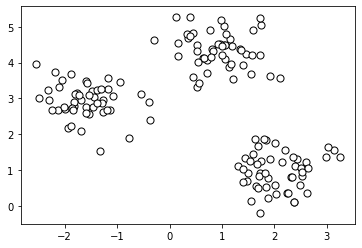

In [4]:
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c='white', edgecolors='black', marker='o', s=50)
plt.show()

In [5]:
## Function for plotting clusters and their centroids.
def cluster_plot(X, centroids, labels, legend=False):
    ## Plots cluster points
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, edgecolors='black')
    ## Plots centroids
    plt.scatter(centroids[:,0], centroids[:,1], s=250, marker='*', c='white', edgecolors='black', label='centroids')
    
    if legend==True:
        plt.legend(loc='best')
    
    plt.show()

We can now compare the iterations with both the random initialization and $k$-means++. Note that the initial position of centroids influence the final positions, so two runs of k-means can result in two different models.

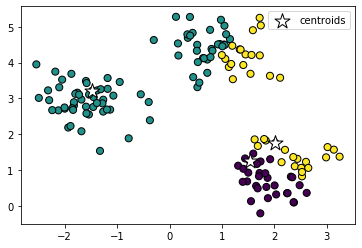

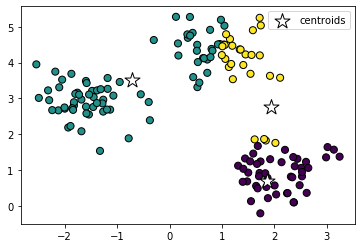

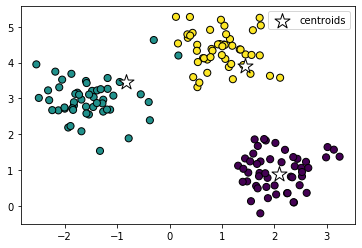

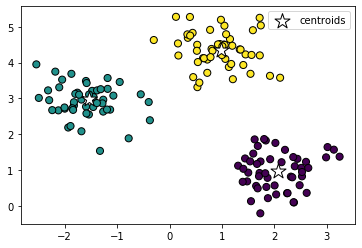

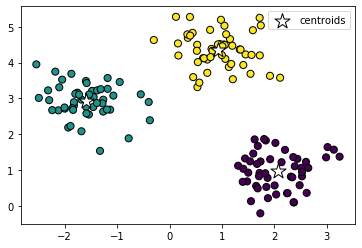

centroids:
 [[ 2.06521743  0.96137409]
 [-1.5947298   2.92236966]
 [ 0.9329651   4.35420712]]
labels:
 [0 2 2 2 0 2 2 0 1 2 0 1 1 2 2 1 1 0 1 0 2 0 2 2 1 0 0 2 1 0 1 1 1 1 2 0 0
 0 2 2 1 1 2 0 0 0 1 2 1 2 0 2 2 0 0 1 2 0 1 2 1 1 1 1 2 1 2 0 2 2 2 0 0 2
 0 2 2 1 1 2 0 0 2 2 0 0 0 1 1 0 0 2 0 2 0 2 1 1 0 0 0 0 1 0 0 2 1 2 2 2 1
 2 0 1 2 1 2 2 1 1 2 0 2 2 0 0 1 0 1 1 1 1 0 1 1 1 2 1 0 1 2 2 0 0 1 1 1 1
 0 0]


In [6]:
centroids, labels = k_means(X, 3, plot_iter=True)

print('centroids:\n', centroids)
print('labels:\n', labels)

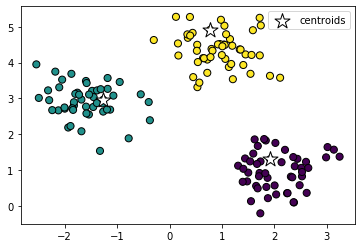

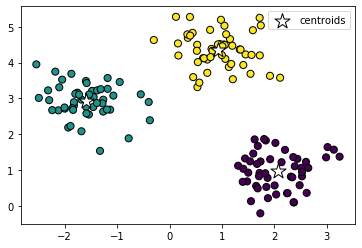

centroids:
 [[ 2.06521743  0.96137409]
 [-1.5947298   2.92236966]
 [ 0.9329651   4.35420712]]
labels:
 [0 2 2 2 0 2 2 0 1 2 0 1 1 2 2 1 1 0 1 0 2 0 2 2 1 0 0 2 1 0 1 1 1 1 2 0 0
 0 2 2 1 1 2 0 0 0 1 2 1 2 0 2 2 0 0 1 2 0 1 2 1 1 1 1 2 1 2 0 2 2 2 0 0 2
 0 2 2 1 1 2 0 0 2 2 0 0 0 1 1 0 0 2 0 2 0 2 1 1 0 0 0 0 1 0 0 2 1 2 2 2 1
 2 0 1 2 1 2 2 1 1 2 0 2 2 0 0 1 0 1 1 1 1 0 1 1 1 2 1 0 1 2 2 0 0 1 1 1 1
 0 0]


In [7]:
centroids, labels = k_means_pp(X, 3, plot_iter=True)

print('centroids:\n', centroids)
print('labels:\n', labels)

Drawing the decision boundaries for the clusters, we see a partition of the plane, which is the corresponding Voronoi diagram. Different background colors represent regions in which all points belong to the same cluster.

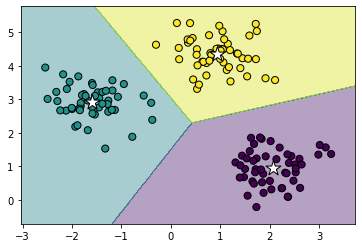

In [8]:
def k_means_predict(X, centroids, dist='euclidean'):
    predict_labels = pairwise_distances(X, centroids, metric=dist).argmin(axis=1)
    return predict_labels

def plot_boundaries(X, centroids, labels):
    ## Set plot range
    x1_range = [X[:, 0].min() - 1/2, X[:, 0].max() + 1/2]
    x2_range = [X[:, 1].min() - 1/2, X[:, 1].max() + 1/2]
   
    ## Create grid
    xx1, xx2 = np.meshgrid(np.arange(x1_range[0], x1_range[1], 0.01),
                     np.arange(x2_range[0], x2_range[1], 0.01))

    ## Predict over grid 
    y = k_means_predict(np.c_[xx1.reshape(-1), xx2.reshape(-1)], centroids)
    y = y.reshape(xx1.shape)
    
    ## Plot contour
    plt.contourf(xx1, xx2, y, alpha=0.4)

    cluster_plot(X, centroids, labels)
    
plot_boundaries(X, centroids,labels)

### Determining the number of clusters

The $k$-means algorithm requires the number of clusters $k$ beforehand as a hyperparameter. In the previous example, we were able to see the data and easily decide the number of clusters. In many cases, $k$ is defined as part of the problem. However, the correct choice of $k$ is often unknown and one requires that it is estimated from the data. 

To quantify the quality of clustering, we can consider the within-cluster sum of squared errors $$ \sum_{i=1}^{k} \sum_{x \in C_i} d(x, \mu_i)^2.$$ 

Note that increasing $k$ will reduce the amount of error in the resulting clustering, to the extreme case of zero error if each data point is considered as its own cluster.

In [9]:
def objective(X, centroids, labels):
    k = centroids.shape[0]
    inertia = 0.
    for i in range(k):
        cluster = X[labels==i]
        for j in range(cluster.shape[0]):
            inertia += np.linalg.norm(cluster[j] - centroids[i]) ** 2
    return inertia

A simple approach is the **elbow method** in which we identify the value of $k$ where the within-cluster sum of squared errors begins to decrease more slowly ("elbows").

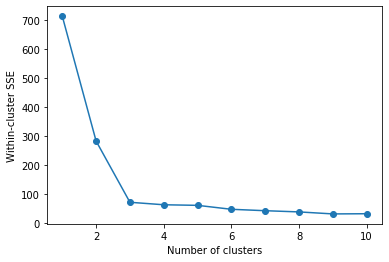

In [10]:
sse = []
for k in range(1, 11):
    centroids, labels = k_means_pp(X, k)
    sse.append(objective(X, centroids, labels))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

As we can see from the plot above, the *elbow* is located at $k=3$, which provides evidence that $k=3$ is indeed a good choice for this dataset.

This method is often ambiguous and not very reliable, and hence other approaches for determining the number of clusters such as the **silhouette analysis** method or **prediction strength** may be preferable.

### Scikit-learn

The Scikit-learn package provides an implementation of the $k$-means algorithm. For more information, see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

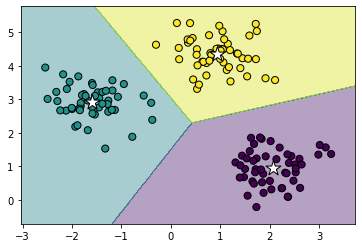

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04)
km.fit(X)

centroids = km.cluster_centers_
labels = km.predict(X)

plot_boundaries(X, centroids, labels)

## Non-convex cases

In $k$-means, each cluster is defined solely by its centroid, which means that each cluster is a convex shape. As a result of this, $k$-means can only capture relatively simple shapes, and performs poorly if the desired clusters have more complex shapes. The algorithm also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly
in the middle between the cluster centers.

Let us take the following example of two moons. If our aim is to split the two moon shapes into different clusters, this is not possible with $k$-means.

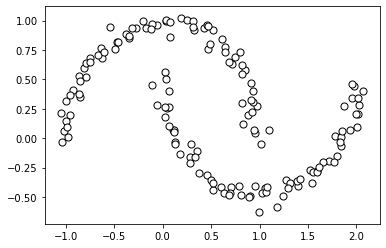

In [12]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.05, random_state=0)
plt.scatter(X_moons[:,0], X_moons[:,1], c='white', edgecolors='black', marker='o', s=50)
plt.show()

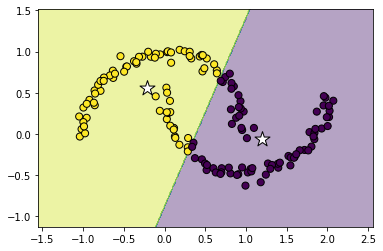

In [13]:
centroids, labels = k_means_pp(X_moons, 2)

plot_boundaries(X_moons, centroids, labels)

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a clustering method that can be used for nonconvex clusters. Instead of guessing the number of clusters $k$, the algorithm takes two hyperparameters `eps` and `min_samples`. ([scikit-learn link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html))

The algorithm works by picking an arbitrary point to start with. It then finds all points with distance `eps` or less from that point. If there are less than `min_samples` points within distance `eps` of the starting point, this point is labeled as noise, meaning that it doesn’t belong to any cluster, and labeled as -1. If there are more than `min_samples` points within a distance of `eps` , the point is labeled a core sample and assigned a new cluster label. Then, all neighbors (within `eps`) of the point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. If
they are core samples, their neighbors are visited in turn, and so on. The cluster grows until there are no more core samples within distance `eps` of the cluster. Then another point that hasn’t yet been visited is picked, and the same procedure is repeated.

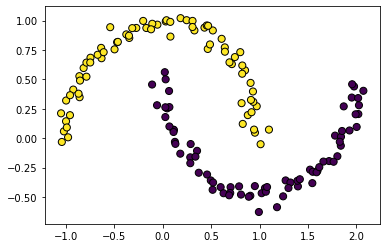

In [14]:
from sklearn.cluster import DBSCAN

clf=DBSCAN(eps=0.2, min_samples=5)
clf.fit(X_moons)
labels = clf.labels_

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels, s=50, edgecolors='black')
plt.show()

Advanced methods such as **spectral clustering** are also useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. ([scikit-learn link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html))

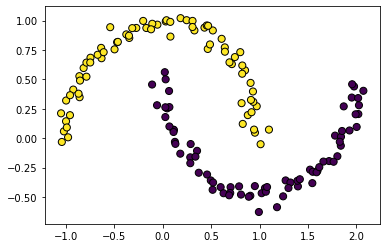

In [15]:
from sklearn.cluster import SpectralClustering
clf = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
clf.fit(X_moons)
labels = clf.labels_

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels, s=50, edgecolors='black')

plt.show()

## Example: Clustering the Titanic feature vectors

In [16]:
## Titanic dataset from Class 5. The file train.csv is needed.

import csv

with open('train.csv', 'r') as f:
    data = csv.reader(f)

    row = data.__next__()
    features_names = np.array(row)

    x = []
    y = []

    for row in data:
        x.append(row)
        y.append(row[1])

    x = np.array(x)
    y = np.array(y)
    
## Data preprocessing    
x = x[:, [2, 4, 5, 6, 7, 9]]
features_names = features_names[[2, 4, 5, 6, 7, 9]]

x[:,1] = (x[:,1] == 'female').astype(np.float)

ages = x[:,2]
mean_age = np.mean(x[ages != '',2].astype(np.float))
x[ages == '', 2] = mean_age

x = x.astype(np.float)
y = y.astype(np.int)

x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x = (x - x_mean) / x_std 

print(features_names)
print(x)

['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare']
[[ 0.82737724 -0.73769513 -0.5924806   0.43279337 -0.47367361 -0.50244517]
 [-1.56610693  1.35557354  0.63878901  0.43279337 -0.47367361  0.78684529]
 [ 0.82737724  1.35557354 -0.2846632  -0.4745452  -0.47367361 -0.48885426]
 ...
 [ 0.82737724  1.35557354  0.          0.43279337  2.00893337 -0.17626324]
 [-1.56610693 -0.73769513 -0.2846632  -0.4745452  -0.47367361 -0.04438104]
 [ 0.82737724 -0.73769513  0.17706291 -0.4745452  -0.47367361 -0.49237783]]


In [17]:
## k-means algorithm applied to the feature vectors.
centroids, labels = k_means_pp(x, 2)

print(centroids)
print(np.transpose(np.vstack((y,labels))))

[[-1.40335     0.18334308  0.70139708 -0.10798042 -0.0417      0.87366304]
 [ 0.54732839 -0.07150666 -0.2735558   0.04211405  0.01626365 -0.34074222]]
[[0 1]
 [1 0]
 [1 1]
 ...
 [0 1]
 [1 0]
 [0 1]]


In [18]:
## Comparison between the cluster labels and the true labels.
def zero_one_loss(y_true, y_pred):
    n = y_true.shape[0]
    return (1/n) * np.sum(y_true != y_pred)

print(min(zero_one_loss(y, labels), zero_one_loss(y, 1 - labels))) 
    ## Performance depends on the random labeling assigned to the clusters.

0.3254769921436588


In [19]:
## With scikit-learn.
km = KMeans(n_clusters=2, init='k-means++')
labels = km.fit_predict(x)                                                   

print(min(zero_one_loss(y, labels), zero_one_loss(y, 1 - labels)))

0.3254769921436588


## Practice yourself

1. Update the $k$-means algorithm so that it repeats itself several times with different randomly chosen initial centroids. Also try the algorithm with different distances. (eg. Manhattan distance)
2. Try to use cross-validation to determine the number of clusters in the $k$-means algorithm. How will it be different in clustering than in the supervised learning case?
3. Use the $k$-means algorithm on the MNIST dataset to cluster digits without using their labels. Compare with the actual labels to see how well the algorithm performs without prior knowledge.